Intentamos otra arquitectura propia basada en Unet

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

import numpy as np
import pandas as pd
import os
from skimage.transform import resize
from keras.preprocessing.image import array_to_img, img_to_array, load_img#,save_img
from skimage.io import imread, imshow #, concatenate_images
import PIL 
from PIL import Image
import re
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

['stanford-car-dataset-by-classes-folder', 'carvana-image-masking-challenge', 'intel-image-classification', '12v2-tfm-cardrawing-try-merge-background-dat', 'manualdraw']


Using TensorFlow backend.


In [2]:
!ls '../input/12v2-tfm-cardrawing-try-merge-background-dat'

__notebook__.ipynb  __results__.html   custom.css
__output__.json     __results___files  unet-carvana-augmented.hdf5


Leemos el modelos Unet

Hemos entrenado el modelo en el Notebook 12, erpo en el 12 hemos echado un vistazo rapido al Standford cars, intentaremos analizar un poco mas a fondo el comportamento de la unet sobre el StandFord y mirar si podemos detectar cosas

In [3]:


standfordcars_train = '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train'
standfordcars_test = '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/test'

images=[]
for x in os.listdir(standfordcars_train):
    for image in os.listdir(standfordcars_train+'/'+str(x)):
        images.append(standfordcars_train+'/'+str(x)+'/'+image)
        
for x in os.listdir(standfordcars_test):
    for image in os.listdir(standfordcars_test+'/'+str(x)):
        images.append(standfordcars_test+'/'+str(x)+'/'+image)
        
print(len(images))
images[0:5]

16185


['../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/Bentley Continental GT Coupe 2012/07754.jpg',
 '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/Bentley Continental GT Coupe 2012/06005.jpg',
 '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/Bentley Continental GT Coupe 2012/04613.jpg',
 '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/Bentley Continental GT Coupe 2012/06800.jpg',
 '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/Bentley Continental GT Coupe 2012/00146.jpg']

In [4]:
#https://colab.research.google.com/drive/1I71fcobEI5uUR_8vaaXZHMw4vQX00C-W
import math
import glob
import random

import gym
import numpy as np
from sklearn import metrics, manifold
from matplotlib import pyplot as plt

import keras
from keras.layers import Input, Conv2DTranspose,Dense, Dropout, Conv2D, MaxPool2D, Flatten, LSTM, Conv1D, MaxPool1D, Lambda, Multiply,UpSampling2D
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import np_utils 
from keras.datasets import mnist
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import sequence
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.optimizers import Adam
from keras import backend as K

def rescale(x):
    mask = K.cast(x >= .5, dtype=K.floatx())
    return mask + (x) * (1-mask)




lambda x: 1 if x > 0.5 == 0 else 0

<function __main__.<lambda>(x)>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

import numpy as np
import pandas as pd
import os
from skimage.transform import resize
from keras.preprocessing.image import array_to_img, img_to_array, load_img#,save_img
from skimage.io import imread, imshow #, concatenate_images
import PIL 
from PIL import Image
import re


['stanford-car-dataset-by-classes-folder', 'carvana-image-masking-challenge', 'intel-image-classification', '12v2-tfm-cardrawing-try-merge-background-dat', 'manualdraw']


['189a2a32a615_06.jpg', '2ea62c1beee7_05.jpg', '189a2a32a615_14.jpg', 'ef5567efd904_09.jpg', 'c53e374fdd72_14.jpg']
[[[0.96078431 0.95686275 0.97647059]
  [0.96078431 0.95686275 0.97647059]
  [0.96078431 0.95686275 0.97647059]
  ...
  [0.9254902  0.90980392 0.91372549]
  [0.9254902  0.90980392 0.91372549]
  [0.9254902  0.90980392 0.91372549]]

 [[0.96078431 0.95686275 0.97647059]
  [0.96078431 0.95686275 0.97647059]
  [0.96078431 0.95686275 0.97647059]
  ...
  [0.9254902  0.90980392 0.91372549]
  [0.9254902  0.90980392 0.91372549]
  [0.9254902  0.90980392 0.91372549]]

 [[0.96078431 0.95686275 0.97647059]
  [0.96078431 0.95686275 0.97647059]
  [0.96078431 0.95686275 0.97647059]
  ...
  [0.9254902  0.90980392 0.91372549]
  [0.9254902  0.90980392 0.91372549]
  [0.9254902  0.90980392 0.91372549]]

 ...

 [[0.83137255 0.82745098 0.84705882]
  [0.83137255 0.82745098 0.84705882]
  [0.83137255 0.82745098 0.84705882]
  ...
  [0.89411765 0.89411765 0.89411765]
  [0.89411765 0.89411765 0.8941176

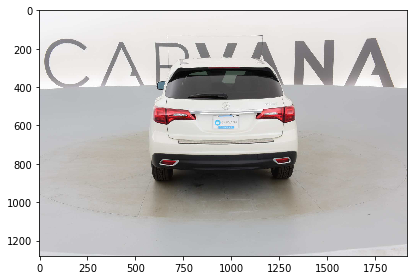

In [6]:


def files_names_in_path(path="",extension=".jpg"):
    files = []
    masks = []
    for f in os.listdir(path):
        filename, file_extension = os.path.splitext(f)
        if file_extension == '.gif':
            files.append(filename.replace('_mask','')+".jpg")
            masks.append(filename+"_mask.gif")
            
    return files, masks
car_path = '../input/carvana-image-masking-challenge/train/'
mask_path = '../input/carvana-image-masking-challenge/train_masks/'
input_files,input_masks = files_names_in_path(mask_path)

print(input_files[0:5])
def load_image_and_normalize_and_resize(file_path="",normalize=True):
    if normalize:
        return (imread(file_path)/255)
    else:
        return (imread(file_path))
    

print(load_image_and_normalize_and_resize(car_path+np.random.choice(input_files,1)[0]))
print(imshow(load_image_and_normalize_and_resize(car_path+np.random.choice(input_files,2)[0])))
print(load_image_and_normalize_and_resize(car_path+np.random.choice(input_files,1)[0]).shape)
HEIGH = load_image_and_normalize_and_resize(car_path+np.random.choice(input_files,1)[0]).shape[0]
WIDTH = load_image_and_normalize_and_resize(car_path+np.random.choice(input_files,1)[0]).shape[1]


In [7]:
mask = pd.read_csv('../input/carvana-image-masking-challenge/train_masks.csv')

In [8]:


from sklearn.model_selection import train_test_split
train_input, test_input, _, _ = train_test_split(input_files, input_files, test_size=0.15, random_state=42)
print(len(train_input))
print(len(test_input))



4324
764


In [9]:
tt=np.ones((8,8,3))
tt[...,:,0]=7
tt[...,:,1]=8
tt[...,:,2]=10
#tt[0,...,:]=8
#print(tt)
tt[tt[:,:,0]<8,0].mean()



7.0

In [10]:
import cv2
H=256
W=256
def downsample(img, h, w):    
    # ret = resize(img, (h, w), mode='constant', preserve_range=True)
    # plt.imshow(ret)
    return cv2.resize(img, (h, w))

def get_edge_v2(img):
    blurred = cv2.GaussianBlur(img, (7,7), 0) # Remove noise
    #close the small line gaps using errosion
    kernel = np.ones((3,3), np.uint8)
    erode = cv2.erode(blurred, kernel, iterations = 3)
    #plt.imshow(erode)
    #cannyedge 
    def canny_edge_detector(input_img, threshold1, threshold2, draw=True, save=True):
        canny_img = cv2.cvtColor(np.copy(input_img), cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(canny_img, threshold1, threshold2)
        return edges
    #try adding Eroding before edge detection(increase black lines)
    canny_edges = canny_edge_detector(input_img=erode, threshold1=100, threshold2=150) 
    #return np.invert(canny_edges)#return np.invert(canny_edges)
    #plt.imshow(canny_edges)

    #close the small line gaps using dilation
    kernel = np.ones((5,5), np.uint8)
    dilation_canny = cv2.dilate(canny_edges, kernel, iterations = 3)
    canny_blurred = cv2.GaussianBlur(dilation_canny, (3,3), 0) # Remove noise
    #invetimos la mascara queremos el blanco de fondo y el negro como dibujo del coche
    return np.invert(canny_blurred)


import skimage
BATCH_SIZE=32

def get_clean_image(path,path_mask):    
    img = cv2.imread(path)
    # img = cv2.resize(img, (h, w))
    # print(imshow(img))
    #mask = cv2.imread(maskimage)
    mask=np.int8((imread(path_mask)))
    # print(mask)   
    # get first masked value (foreground)
    fg = cv2.bitwise_or(img, img, mask=mask)
    # get second masked value (background) mask must be inverted
    mask = cv2.bitwise_not(mask)
    background = np.full(img.shape, 255, dtype=np.uint8)
    bk = cv2.bitwise_or(background, background, mask=mask)

    # combine foreground+background
    final = cv2.bitwise_or(fg, bk)

    return final


def generator_int(path, batch_size=BATCH_SIZE, normalize=True, augmented=True):
    while True:
        #retedge = np.zeros((batch_size,H,W,3),dtype=np.int16)
        #retimg = np.zeros((batch_size,H,W,3),dtype=np.int16)
        retedge = []
        retimg = []
        colorimg = []
        averagecolor=[]
        imgorig=[]
        for x in range(batch_size):
            car = np.random.choice(path,1)[0]
            carpath = car_path+car
            maskpath = mask_path+car.replace('.jpg','_mask.gif')
            #print(maskpath)        
            #img = cv2.imread(carpath)
            img = get_clean_image(carpath, maskpath)
            img_reduct=downsample(img,H,W)
            #average = (img_reduct).mean(axis=0).mean(axis=0)
            
            avg=np.ones((H,W,3))
            #print(img_reduct[img_reduct[:,:,0]<255,0].mean())
            avg[...,:,0]=img_reduct[img_reduct[:,:,0]<255,0].mean()
            avg[...,:,1]=img_reduct[img_reduct[:,:,1]<255,1].mean()
            avg[...,:,2]=img_reduct[img_reduct[:,:,2]<255,2].mean()
            #print(avg)
            averagecolor.append(avg/255)
            colorimg.append(img_reduct/255)
            mask = get_edge_v2(img)
            img_wb = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            
            retimg.append(downsample(img_wb,H,W).reshape(H,W,1)/255)
            #img =  get_clean_image(carpath, maskpath)
            
           # mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
            retedge.append(np.invert((downsample(mask,H,W))).reshape(H,W,1)/255)
        yield [np.array(retedge),np.array(averagecolor)], [np.array(retimg), np.array(colorimg)]

indx=500
carimage = car_path+input_files[indx]
maskimage = mask_path+input_files[indx].replace('.jpg','_mask.gif')
# img = get_clean_image(carimage, maskimage)
inputs, outputs= next(generator_int(train_input,32,False))
print(inputs[0].shape)
print(outputs[0].shape)
print(np.max(inputs[0]))
print(np.max(inputs[1]))
print(np.max(outputs[0]))
print(np.max(outputs[1]))

(32, 256, 256, 1)
(32, 256, 256, 1)
1.0
0.7085721074460146
1.0
1.0


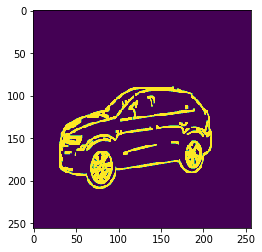

In [11]:
plt.imshow(inputs[0][0].reshape(H,W))



0.22905954811913665

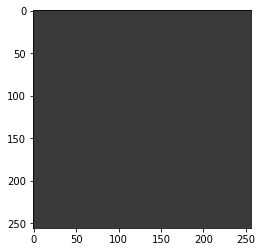

In [12]:
plt.imshow(inputs[1][0])
inputs[1][0].mean()

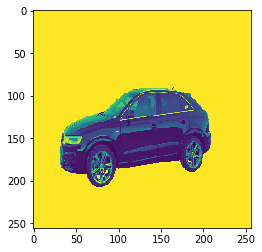

In [13]:
plt.imshow(outputs[0][0].reshape(H,W))

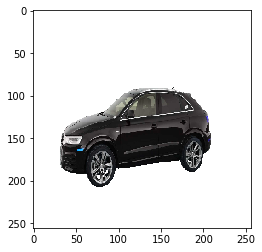

In [14]:
plt.imshow(outputs[1][0])

In [15]:
def conv2d_block(input_tensor, n_filters, kernel_size=3, batchnorm=True):
    # first layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # second layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x
def get_unet(input_img, n_filters=16, dropout=0.5, batchnorm=True, chanels_out=1):
    # contracting path
    c1 = conv2d_block(input_img, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    p1 = MaxPooling2D((2, 2)) (c1)
    p1 = Dropout(dropout*0.5)(p1)

    c2 = conv2d_block(p1, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
    p2 = MaxPooling2D((2, 2)) (c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
    p3 = MaxPooling2D((2, 2)) (c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters=n_filters*16, kernel_size=3, batchnorm=batchnorm)
    
    # expansive path
    u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)

    u7 = Conv2DTranspose(n_filters*4, (3, 3), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)

    u8 = Conv2DTranspose(n_filters*2, (3, 3), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)

    u9 = Conv2DTranspose(n_filters*1, (3, 3), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    #, activation='none'
    outputs = Conv2D(chanels_out, (1, 1), activation='sigmoid') (c9)
    # model = Model(inputs=[input_img], outputs=[outputs])
    return outputs

In [16]:
input_edge = Input(shape=(256, 256, 1), name="edge")  # adapt this if using `channels_first` image data format
input_color = Input(shape=(256, 256, 3), name="color")  # adapt this if using `channels_first` image data format

outedge = get_unet(input_edge, n_filters=64, dropout=0.5, batchnorm=True,chanels_out=1)

subtracted = keras.layers.Subtract()([input_color, outedge])
# mult = keras.layers.multiply([input_color, outedge])
colorcar = get_unet(subtracted, n_filters=64, dropout=0.5, batchnorm=True,chanels_out=3)

model = Model([input_edge, input_color],[outedge, colorcar])
model.compile(optimizer='adam', loss=['binary_crossentropy','binary_crossentropy'])
              #, loss_weights=[100, 1])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
edge (InputLayer)               (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 640         edge[0][0]                       
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activat

In [17]:
!pip install livelossplot

In [18]:
from livelossplot.keras import PlotLossesCallback

# initialize the number of epochs and batch size
# definimos nuestro callback para guardar
saver = ModelCheckpoint('unet-carvana-augmented_edges_to_image.hdf5', save_best_only=True, monitor='val_loss', mode='min')

EPOCHS = 300
BS = 10

# train the network
model.fit_generator(generator_int(train_input,BS,False),
    validation_data=(generator_int(test_input,BS,False)), steps_per_epoch=15, 
    validation_steps = 10,
    epochs=EPOCHS, callbacks=[saver,PlotLossesCallback()])



In [19]:
model2 = load_model('unet-carvana-augmented_edges_to_image.hdf5')

In [20]:
# inputs, outputs= next(generator_int(train_input,32,False))

In [21]:
inputs, outputs= next(generator_int(test_input,5,False))
preds = model2.predict([inputs[0],inputs[1]])
print(preds[0].shape)

(5, 256, 256, 1)


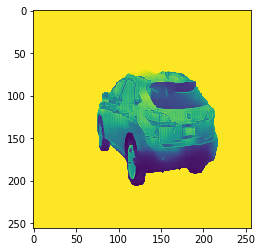

In [22]:
plt.imshow(preds[0][1].reshape(H,W))

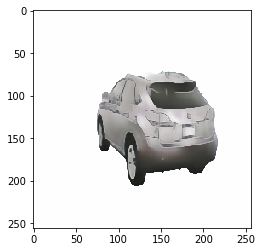

In [23]:
plt.imshow(preds[1][1])

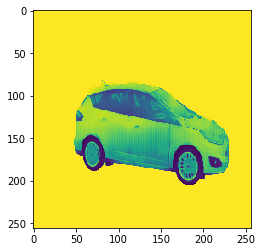

In [24]:
plt.imshow(preds[0][2].reshape(H,W))

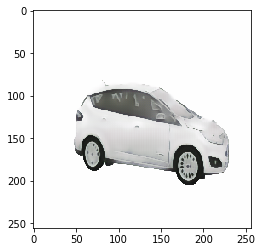

In [25]:
plt.imshow(preds[1][2])

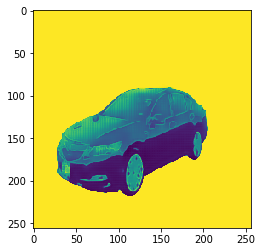

In [26]:
plt.imshow(preds[0][3].reshape(H,W))

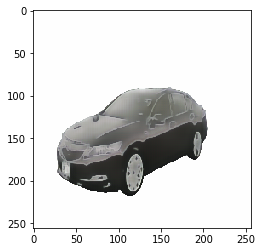

In [27]:
plt.imshow(preds[1][3])

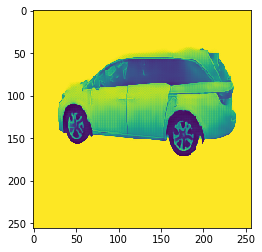

In [28]:
plt.imshow(preds[0][4].reshape(H,W))

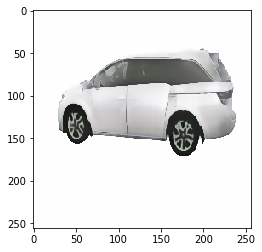

In [29]:
plt.imshow(preds[1][4])

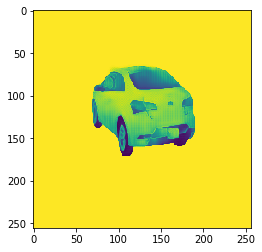

In [30]:
plt.imshow(preds[0][0].reshape(H,W))

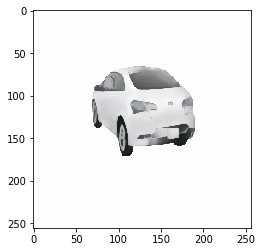

In [31]:
plt.imshow(preds[1][0])

In [32]:
#END DEL NOTEBOOK 

In [33]:
#input_img = Input(shape=(256, 256, 1), name="carvanacar")  # adapt this if using `channels_first` image data format
#out = get_unet(input_img, n_filters=64, dropout=0.5, batchnorm=True,chanels_out=1)
#model = Model(input_img, out)
#model.compile(optimizer='adam', loss='binary_crossentropy')
#model.summary()

In [34]:
#image_test,edge_test =  next(generator_int(test_input,400,False))
print("DONE")

DONE


In [35]:
# initialize the number of epochs and batch size
# definimos nuestro callback para guardar
saver = ModelCheckpoint('unet-carvana-augmented_edges_to_image.hdf5', save_best_only=True, monitor='val_loss', mode='min')

EPOCHS = 100
BS = 20

# train the network
#H = model.fit_generator(generator_int(train_input,BS,False),
#    validation_data=(generator_int(test_input,BS,False)), steps_per_epoch=15, 
#    validation_steps = 10,
#    epochs=EPOCHS, callbacks=[saver])

AttributeError: 'int' object has no attribute 'history'

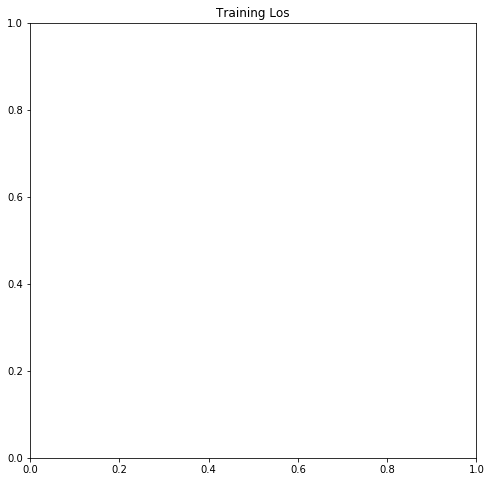

In [36]:
plt.figure(figsize=(8, 8))
plt.title("Training Los")
plt.plot(H.history["loss"], label="loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.plot( np.argmin(H.history["val_loss"]), np.min(H.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("binarycross")
plt.legend();

In [37]:
from keras.models import Model, load_model
#model2 = load_model('unet-carvana-augmented_edges_to_image.hdf5')
#model2.summary()

In [38]:
#img, edge = next(generator_int(test_input,BS,False))

In [39]:
#preds = model2.predict(img)

In [40]:
plt.imshow(img[0].reshape(H,W))

NameError: name 'img' is not defined

In [41]:
plt.imshow(preds[0].reshape(H,W))

ValueError: cannot reshape array of size 327680 into shape (256,256)

In [42]:
plt.imshow(edge[0].reshape(H,W))

NameError: name 'edge' is not defined

In [43]:
standfordcars_train = '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train'
standfordcars_test = '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/test'

images=[]
for x in os.listdir(standfordcars_train):
    for image in os.listdir(standfordcars_train+'/'+str(x)):
        images.append(standfordcars_train+'/'+str(x)+'/'+image)
        
for x in os.listdir(standfordcars_test):
    for image in os.listdir(standfordcars_test+'/'+str(x)):
        images.append(standfordcars_test+'/'+str(x)+'/'+image)
        
print(len(images))
images[0:5]

16185


['../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/Bentley Continental GT Coupe 2012/07754.jpg',
 '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/Bentley Continental GT Coupe 2012/06005.jpg',
 '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/Bentley Continental GT Coupe 2012/04613.jpg',
 '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/Bentley Continental GT Coupe 2012/06800.jpg',
 '../input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/Bentley Continental GT Coupe 2012/00146.jpg']

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), but instead got the following list of 1 arrays: [array([[[[0.94509804],
         [0.94509804],
         [0.96078431],
         ...,
         [1.        ],
         [1.        ],
         [1.        ]],

        [[0.96862745],
         [0.96078431],...

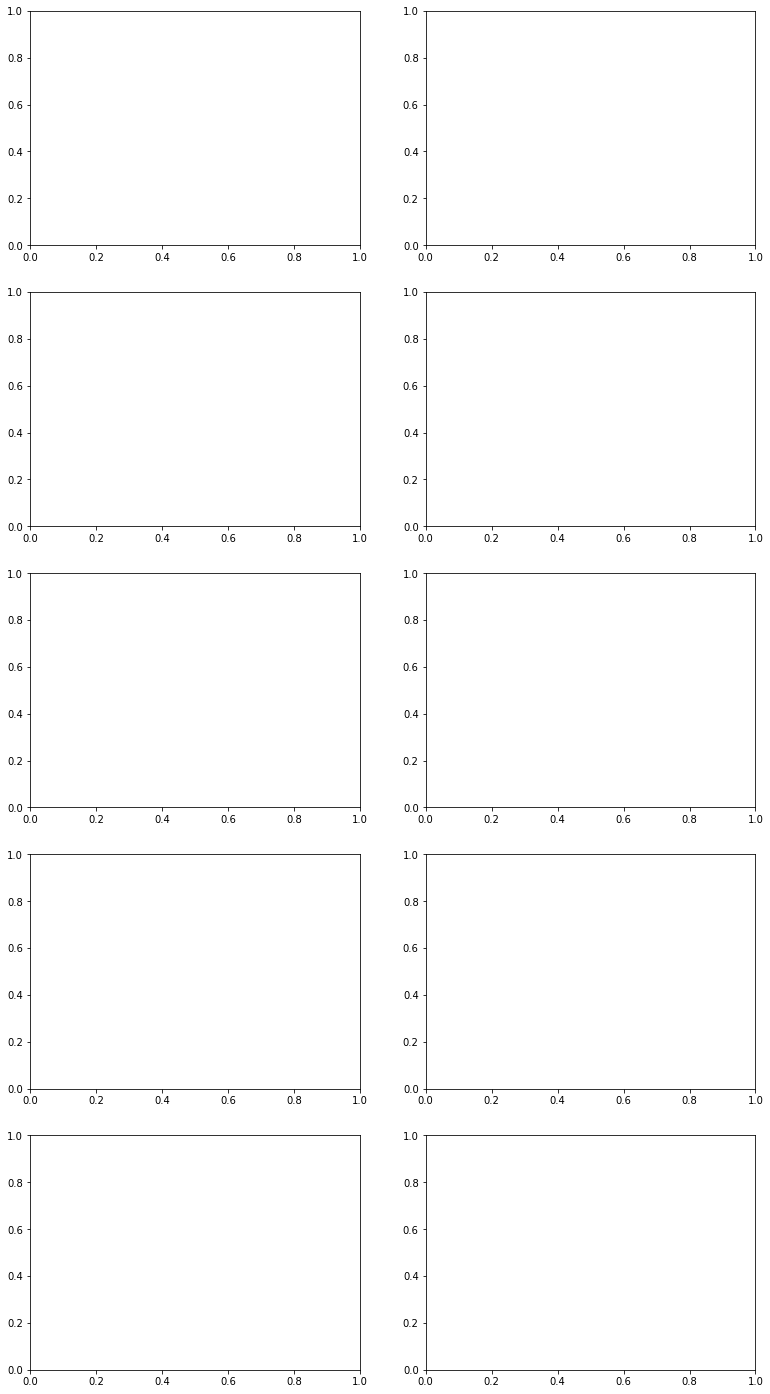

In [44]:
def get_img_info(img):
    #plt.imshow(img)
    #print("SHAPE-->", img.shape)
    #plt.show()
    lista=[]
    tmp = downsample(img,H,W)
    img = cv2.cvtColor(np.uint8(tmp), cv2.COLOR_RGB2GRAY).reshape(H,W,1)
    lista.append(img/255)
    lista.append(img/255)
    xpred = model2.predict(np.array(lista).reshape(2,H,W,1))
    xpred=xpred<0.5
    #plt.imshow(final_car)
    #plt.show()
    return img.reshape(H,W), xpred[0].reshape(H,W)

def myplot():
    # original predict mask only_car edges
    rows = 5
    fig,ax=plt.subplots(rows,2,figsize=(13,25))
    for x in range(rows):
        imgpath = randomimg[x]
        img = imread(imgpath)
        resized, mask = get_img_info(img)
        ax[x,0].imshow(resized)
        ax[x,1].imshow(mask)

        


# Vamos a hacer print de unas 10 imagenes random
randomimg = np.random.choice(images,250)
myplot()        

In [45]:
input_img = Input(shape=(256, 256, 1), name="carvanacar")  # adapt this if using `channels_first` image data format
input_car = Input(shape=(256, 256, 1), name="standford")  # adapt this if using `channels_first` image data format

edges = get_unet(input_img, n_filters=64, dropout=0.5, batchnorm=True,chanels_out=1)

computebit0 = Lambda(rescale)(edges)
mult_input = Multiply()([computebit0, input_car])

reconstructed = get_unet(mult_input, n_filters=64, dropout=0.5, batchnorm=True,chanels_out=3)


#double_model = Model([input_img, input_car], [edges,reconstructed])
#double_model.compile(optimizer='adam', loss='binary_crossentropy')
#double_model.summary()


In [46]:
# joined two inputs plus two ouputs
from keras import backend as K



x = Conv2D(64, (8, 8),strides=2, activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2),strides=2, padding='same')(x)
x = Conv2D(32, (8, 8),strides=2, activation='relu', padding='same')(x)
x = MaxPooling2D((8, 8),strides=2, padding='same')(x)
x = Conv2D(16, (8, 8),strides=2, activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
edges = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
#computebit0 = Lambda(lambda x: 1 if x > 0.5 else 0)(edges)
computebit0 = Lambda(rescale)(edges)
mult_input = Multiply()([computebit0, input_car])
xx = Conv2D(64, (3, 3),strides=2, activation='relu', padding='same')(mult_input)
xx = MaxPooling2D((2, 2),strides=2, padding='same')(xx)
xx = Conv2D(32, (3, 3),strides=2, activation='relu', padding='same')(xx)
xx = MaxPooling2D((2, 2), padding='same')(xx)
xx = Conv2D(16, (3, 3),strides=2, activation='relu', padding='same')(xx)
xxencoded = MaxPooling2D((2, 2), padding='same')(xx)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

xx = Conv2D(16, (3, 3),strides=2, activation='relu', padding='same')(xxencoded)
xx = UpSampling2D((2, 2))(xx)
xx = Conv2D(32, (3, 3),strides=2, activation='relu', padding='same')(xx)
xx = UpSampling2D((2, 2))(xx)
xx = Conv2D(64, (3, 3),strides=2, activation='relu')(xx)
xx = UpSampling2D((2, 2))(xx)
reconstructed = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(xx)




double_model = Model([input_img, input_car], [edges,reconstructed])
double_model.compile(optimizer='adam', loss='binary_crossentropy')
double_model.summary()

#once model trianed



ValueError: Operands could not be broadcast together with shapes (28, 28, 1) (256, 256, 1)

In [47]:
inputs = Input(shape=(256, 256, 1))
c0 = Conv2D(32, kernel_size=8, strides=2, activation='relu')(inputs)
p0 = MaxPool2D(pool_size=(2, 2))(c0)
c1 = Conv2D(64, kernel_size=2, strides=2, activation='relu')(p0)
p1 = MaxPool2D(pool_size=(2, 2))(c1)
#p1_drop = Dropout(0.25)(p1)
f0 = Flatten()(p1)
d0 = Dense(128, activation='relu')(f0)
d0_drop = Dropout(0.5)(d0)
preds = Dense(10, activation='softmax')(d0_drop)
model = Model(inputs=inputs, outputs=preds)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 125, 125, 32)      2080      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 31, 31, 64)        8256      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1843328   
__________

In [48]:


H = 256
W = 256

def downsample(img, h, w):    
    ret = resize(img, (h, w), mode='constant', preserve_range=True)
    # plt.imshow(ret)
    return ret
    #return cv2.resize(img, (h, w))

In [49]:

def get_clean_image(img,mask):    
    # img = cv2.imread(path)
    # img = cv2.resize(img, (h, w))
    # print(imshow(img))
    #mask = cv2.imread(maskimage)
    # mask=np.int8((imread(path_mask)))
    # print(mask)   
    # get first masked value (foreground)
    img = np.uint8(img)
    mask = np.uint8(mask)
    fg = cv2.bitwise_or(img, img, mask=mask)
    # get second masked value (background) mask must be inverted
    mask = cv2.bitwise_not(mask)
    background = np.full(img.shape, 255, dtype=np.uint8)
    bk = cv2.bitwise_or(background, background, mask=mask)

    # combine foreground+background
    final = cv2.bitwise_or(fg, bk)

    return final

In [50]:
import cv2
def get_edge_v2(img):
    blurred = cv2.GaussianBlur(img, (7,7), 0) # Remove noise
    #close the small line gaps using errosion
    kernel = np.ones((5,5), np.uint8)
    erode = cv2.erode(blurred, kernel, iterations = 1)
    #plt.imshow(erode)
    #cannyedge 
    def canny_edge_detector(input_img, threshold1, threshold2, draw=True, save=True):
        canny_img = cv2.cvtColor(np.copy(input_img), cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(canny_img, threshold1, threshold2)
        return edges
    #try adding Eroding before edge detection(increase black lines)
    canny_edges = canny_edge_detector(input_img=erode, threshold1=50, threshold2=180) 
    #return np.invert(canny_edges)
    #return np.invert(canny_edges)
    #plt.imshow(canny_edges)

    #close the small line gaps using dilation
    kernel = np.ones((3,3), np.uint8)
    dilation_canny = cv2.dilate(canny_edges, kernel, iterations = 1)
    return np.invert(dilation_canny)
    canny_blurred = cv2.GaussianBlur(dilation_canny, (3,3), 0) # Remove noise
    #invetimos la mascara queremos el blanco de fondo y el negro como dibujo del coche
    return np.invert(canny_blurred)

In [51]:

def get_img_info(img):
    #plt.imshow(img)
    #print("SHAPE-->", img.shape)
    #plt.show()
    lista=[]
    tmp = downsample(img,H,W)
    img = cv2.cvtColor(np.uint8(tmp), cv2.COLOR_RGB2GRAY).reshape(H,W,1)
    lista.append(img/255)
    lista.append(img/255)
    xpred = model.predict(np.array(lista).reshape(2,H,W,1))
    #plt.imshow(xpred[0].reshape(H,W))
    #plt.show()
    #print(np.max(img))
    final_car = get_clean_image(tmp, ((xpred[0]>0.8)*255))
    edge = get_edge_v2(np.uint8(tmp))
    #plt.imshow(final_car)
    #plt.show()
    return img.reshape(H,W), xpred[0].reshape(H,W), final_car, edge
    

In [52]:
def myplot():
    # original predict mask only_car edges
    rows = 5
    fig,ax=plt.subplots(rows,4,figsize=(13,25))
    for x in range(rows):
        imgpath = randomimg[x]
        img = imread(imgpath)
        resized, mask, end_car, edges = get_img_info(img)
        ax[x,0].imshow(resized)
        ax[x,1].imshow(mask)
        ax[x,2].imshow(end_car)
        ax[x,3].imshow(edges)

error: OpenCV(4.0.0) /io/opencv/modules/core/src/arithm.cpp:245: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


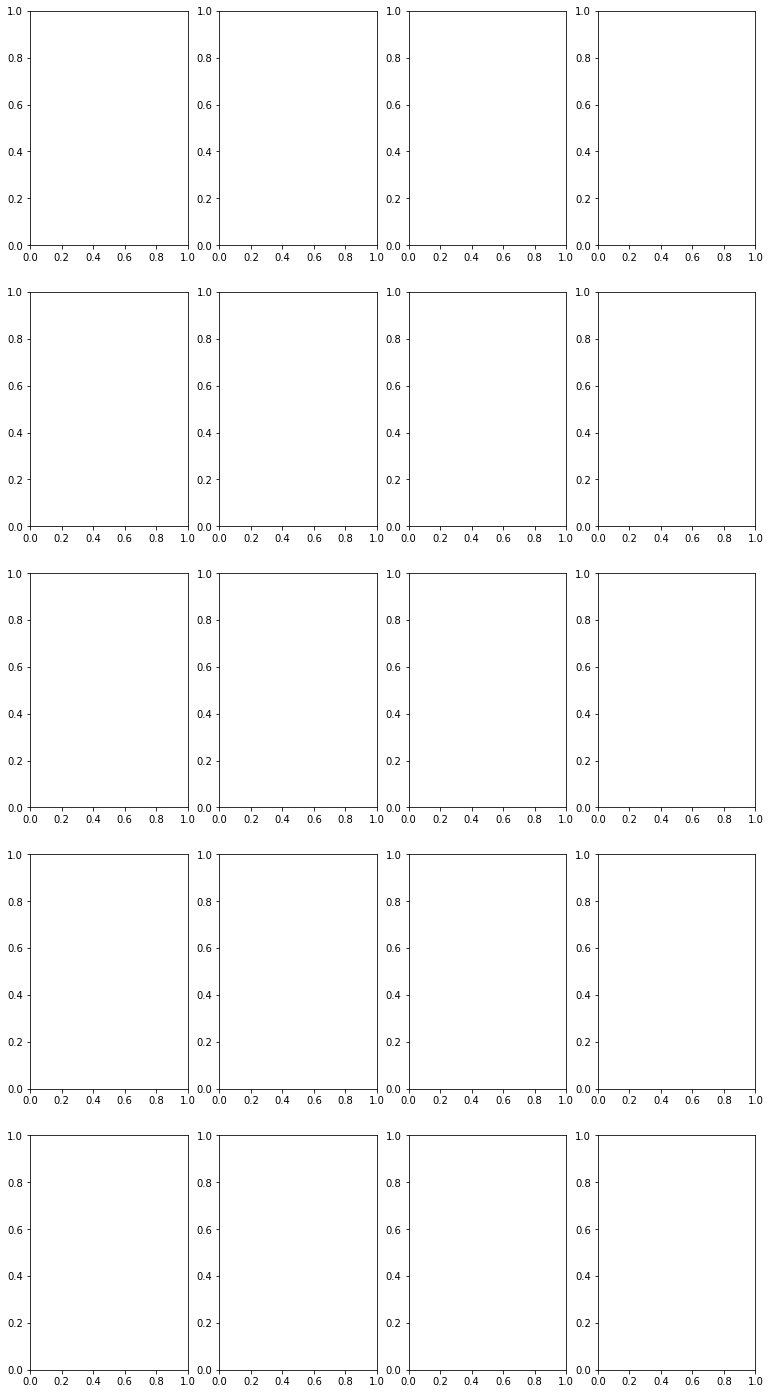

In [53]:
# Vamos a hacer print de unas 10 imagenes random
randomimg = np.random.choice(images,250)
myplot()
#randomimg
#img1 = imread(randomimg[135])
#plot_img_and_info(img1)

In [54]:
BATCH_SIZE=32
def generator_pix_standford(paths, batch_size, h, w):
    img_A=[]
    img_B=[]
    while True:
        for x in range(batch_size):
            randomimg = np.random.choice(paths,1)
            img = imread(randomimg[0])
            # a few images on dataset are black white with dimension 2 and not valid
            while img.ndim != 3:
                randomimg = np.random.choice(paths,1)
                img = imread(randomimg[0])
            resized, mask, end_car, edges = get_img_info(img)
            edges = cv2.cvtColor(np.uint8(edges), cv2.COLOR_GRAY2RGB)
            img_A.append(end_car)
            img_B.append(edges)
        
        yield np.array(img_A), np.array(img_B)
    
A,B = next(generator_pix_standford(images,BATCH_SIZE, H, W))
print(A.shape)
print(B.shape)
print(np.max(A))
print(np.max(B))

error: OpenCV(4.0.0) /io/opencv/modules/core/src/arithm.cpp:245: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


In [55]:
imshow(A[1])

NameError: name 'A' is not defined

In [56]:
imshow(B[1])

NameError: name 'B' is not defined

In [57]:
from sklearn.model_selection import train_test_split
images_train, images_test, _, _ = train_test_split(images, images, test_size=0.10, random_state=42)


In [58]:
from __future__ import print_function, division
import scipy
from keras.datasets import mnist

from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
import sys

import numpy as np
import os

In [59]:
def conv2d_block(input_tensor, n_filters, kernel_size=3, batchnorm=True):
    # first layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # second layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x
def get_unet(input_img, n_filters=16, dropout=0.5, batchnorm=True):
    # contracting path
    c1 = conv2d_block(input_img, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    p1 = MaxPooling2D((2, 2)) (c1)
    p1 = Dropout(dropout*0.5)(p1)

    c2 = conv2d_block(p1, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
    p2 = MaxPooling2D((2, 2)) (c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
    p3 = MaxPooling2D((2, 2)) (c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    p4 = Dropout(dropout)(p4)

    c5 = conv2d_block(p4, n_filters=n_filters*16, kernel_size=3, batchnorm=batchnorm)

    # expansive path
    u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)

    u7 = Conv2DTranspose(n_filters*4, (3, 3), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)

    u8 = Conv2DTranspose(n_filters*2, (3, 3), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)

    u9 = Conv2DTranspose(n_filters*1, (3, 3), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)

    outputs = Conv2D(3, (1, 1), activation='tanh') (c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model    


In [60]:



class Pix2Pix():
    def __init__(self):
        # Input shape
        self.img_rows = H
        self.img_cols = W
        self.channels = 3
        self.img_shape = (self.img_rows, self.img_cols, self.channels)

        # Configure data loader
        self.dataset_name = 'carsdrawpixtopix'


        # Calculate output shape of D (PatchGAN)
        patch = int(self.img_rows / 2**4)
        self.disc_patch = (patch, patch, 1)

        # Number of filters in the first layer of G and D
        self.gf = 64
        self.df = 64

        optimizer = Adam(0.0002, 0.5)
        #optimizer = Adam()

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])

        #-------------------------
        # Construct Computational
        #   Graph of Generator
        #-------------------------

        # Build the generator
        self.generator = self.build_generator()

        # Input images and their conditioning images
        img_A = Input(shape=self.img_shape)
        img_B = Input(shape=self.img_shape)

        # By conditioning on B generate a fake version of A
        fake_A = self.generator(img_B)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # Discriminators determines validity of translated images / condition pairs
        valid = self.discriminator([fake_A, img_B])

        self.combined = Model(inputs=[img_A, img_B], outputs=[valid, fake_A])
        self.combined.compile(loss=['mse', 'mae'],
                              loss_weights=[1, 100],
                              optimizer=optimizer)
    def build_generator(self):
        """U-Net Generator"""

        def conv2d(layer_input, filters, f_size=4, bn=True):
            """Layers used during downsampling"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            if bn:
                d = BatchNormalization(momentum=0.8)(d)
            return d

        def deconv2d(layer_input, skip_input, filters, f_size=4, dropout_rate=0):
            """Layers used during upsampling"""
            u = UpSampling2D(size=2)(layer_input)
            u = Conv2D(filters, kernel_size=f_size, strides=1, padding='same', activation='relu')(u)
            if dropout_rate:
                u = Dropout(dropout_rate)(u)
            u = BatchNormalization(momentum=0.8)(u)
            u = Concatenate()([u, skip_input])
            return u

        # Image input
        d0 = Input(shape=self.img_shape)
        # input_img = Input((H, W, 3), name='img')
        model = get_unet(d0, n_filters=32, dropout=0.5, batchnorm=True)
        return model
        #model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
        #model.summary()
        # Downsampling
        #d1 = conv2d(d0, self.gf, bn=False)
        #d2 = conv2d(d1, self.gf*2)
        #d3 = conv2d(d2, self.gf*4)
        #d4 = conv2d(d3, self.gf*8)
        #d5 = conv2d(d4, self.gf*8)
        #d6 = conv2d(d5, self.gf*8)
        #d7 = conv2d(d6, self.gf*8)

        # Upsampling
        #u1 = deconv2d(d7, d6, self.gf*8)
        #u2 = deconv2d(u1, d5, self.gf*8)
        #u3 = deconv2d(u2, d4, self.gf*8)
        #u4 = deconv2d(u3, d3, self.gf*4)
        #u5 = deconv2d(u4, d2, self.gf*2)
        #u6 = deconv2d(u5, d1, self.gf)

        #u7 = UpSampling2D(size=2)(u6)
        #output_img = Conv2D(1, kernel_size=4, strides=1, padding='same', activation='tanh')(u7)
        #output_img = Conv2D(self.channels, kernel_size=4, strides=1, padding='same', activation='tanh')(u7)

        #return Model(d0, output_img)

    def build_discriminator(self):

        def d_layer(layer_input, filters, f_size=4, bn=True):
            """Discriminator layer"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            if bn:
                d = BatchNormalization(momentum=0.8)(d)
            return d

        img_A = Input(shape=self.img_shape)
        img_B = Input(shape=self.img_shape)

        # Concatenate image and conditioning image by channels to produce input
        combined_imgs = Concatenate(axis=-1)([img_A, img_B])

        d1 = d_layer(combined_imgs, self.df, bn=False)
        d2 = d_layer(d1, self.df*2)
        d3 = d_layer(d2, self.df*4)
        d4 = d_layer(d3, self.df*8)

        validity = Conv2D(1, kernel_size=4, strides=1, padding='same')(d4)

        return Model([img_A, img_B], validity)

    def train(self, epochs, batch_size=1, sample_interval=50):

        start_time = datetime.datetime.now()

        # Adversarial loss ground truths
        valid = np.ones((batch_size,) + self.disc_patch)
        fake = np.zeros((batch_size,) + self.disc_patch)

        for epoch in range(epochs):
            for batch_i in range(batch_size): 
                #in enumerate(self.data_loader.load_batch(batch_size)):
                
                # imgs_B, imgs_A =  generator_resize(train_input,batch_size, False, H,W,True)
                imgs_A, imgs_B =  next(generator_pix_standford(images_train,batch_size, H, W))
                #generator(train_input,batch_size,False)
                #print(imgs_B.shape)
                imgs_A = (imgs_A/127.5)-1
                imgs_B = ((imgs_B/127.5)-1)

    #        for batch_i, (imgs_A, imgs_B) in enumerate(self.data_loader.load_batch(batch_size)):

                # ---------------------
                #  Train Discriminator
                # ---------------------

                # Condition on B and generate a translated version
                fake_A = self.generator.predict(imgs_B)

                # Train the discriminators (original images = real / generated = Fake)
                d_loss_real = self.discriminator.train_on_batch([imgs_A, imgs_B], valid)
                d_loss_fake = self.discriminator.train_on_batch([fake_A, imgs_B], fake)
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

                # -----------------
                #  Train Generator
                # -----------------

                # Train the generators
                g_loss = self.combined.train_on_batch([imgs_A, imgs_B], [valid, imgs_A])

                elapsed_time = datetime.datetime.now() - start_time
                # Plot the progress
                print ("[Epoch %d/%d] [Batch %d/%d] [D loss: %f, acc: %3d%%] [G loss: %f] time: %s" % (epoch, epochs,
                                                                        batch_i, batch_size,
                                                                        d_loss[0], 100*d_loss[1],
                                                                        g_loss[0],
                                                                        elapsed_time))

                # If at save interval => save generated image samples
                if batch_i % sample_interval == 0:
                    self.sample_images(epoch, batch_i)

    def sample_images(self, epoch, batch_i):
        os.makedirs('images/%s' % self.dataset_name, exist_ok=True)
        r, c = 3, 3

        #imgs_B, imgs_A =  generator_resize(train_input,3, False, H,W,True)
        imgs_A, imgs_B =  next(generator_pix_standford(images_test,3, H, W))
                #generator(train_input,batch_size,False)
                
        imgs_A = (imgs_A/127.5)-1
        imgs_B = ((imgs_B/127.5)-1)

#        imgs_A, imgs_B = self.data_loader.load_data(batch_size=3, is_testing=True)
        fake_A = self.generator.predict(imgs_B)

        gen_imgs = np.concatenate([imgs_B, fake_A, imgs_A])

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        titles = ['Condition', 'Generated', 'Original']
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt])
                axs[i, j].set_title(titles[i])
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/%s/%d_%d.png" % (self.dataset_name, epoch, batch_i))
        plt.close()




In [61]:
!rm -r 'images/carsdrawpixtopix/'
!ls 'images/carsdrawpixtopix/'
pixgan = Pix2Pix()
pixgan.train(epochs=200, batch_size=20, sample_interval=10)

rm: cannot remove 'images/carsdrawpixtopix/': No such file or directory
ls: cannot access 'images/carsdrawpixtopix/': No such file or directory


error: OpenCV(4.0.0) /io/opencv/modules/core/src/arithm.cpp:245: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


In [62]:

####################
def files_names_in_path(path="",extension=".jpg"):
    files = []
    for f in os.listdir(path):
        filename, file_extension = os.path.splitext(f)
        if file_extension == extension:
            files.append(path+f)
    return files

epoch_plot = files_names_in_path('images/carsdrawpixtopix/',extension='.png')

####################
import matplotlib.pyplot as plt
%matplotlib inline

for x in epoch_plot:
    plt.imshow(imread(x))
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'images/carsdrawpixtopix/'

In [63]:
!ls "../input/manualdraw"

Lincoln Continental drawing.JPG  images.png	index.jpeg
images.jpeg			 images22.jpeg


/opt/conda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.0
-1.0


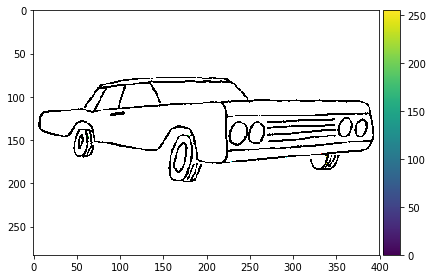

In [64]:
#LA PRUEBA DE FUEGO!! LO PROBAMOS CON UN DIBUJO 100% MANUAL!

def load_image_and_normalize_and_resize(file_path="",normalize=True):
    if normalize:
        return (imread(file_path)/255)
    else:
        return (imread(file_path))
    
imagemanual = load_image_and_normalize_and_resize('../input/manualdraw/Lincoln Continental drawing.JPG',False)
imagemanual = imagemanual/255
super_threshold_indices = imagemanual >= 0.5
super_threshold_indices2 = imagemanual < 0.5
imagemanual[super_threshold_indices] = 1
imagemanual[super_threshold_indices2] = 0
imagemanual = imagemanual*255
imshow(imagemanual)
#print(np.max(imagemanual))
#print(np.min(imagemanual))
imagemanual=((downsample(imagemanual,H,W)/127.5)-1)

print(np.max(imagemanual))
print(np.min(imagemanual))

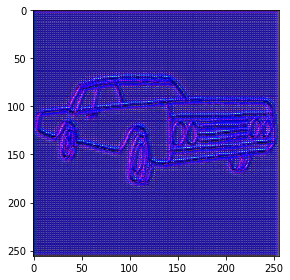

In [65]:
fakeA = pixgan.generator.predict(imagemanual.reshape(1,H,W,3))
fakeA = 0.5 * fakeA + 0.5
# fakeB = (fakeB)*127.5

# fakeA = gan.g_BA.predict(imgB)
#fakeA = 0.5 * fakeA + 0.5
#fakeA = (fakeA+1)*127.5

imshow(fakeA[0])